In [28]:
from google.colab import files
uploaded = files.upload()

Saving Amazon-Product-Reviews-Sentiment-Analysis-in-Python-Dataset (1).csv to Amazon-Product-Reviews-Sentiment-Analysis-in-Python-Dataset (1) (1).csv


In [29]:

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer ##  from sklearn converts text into numerical features
import matplotlib.pyplot as plt ##  for visualization
from wordcloud import WordCloud ## generates word clouds.

In [30]:
## Suppresses warnings to avoid clutter in the output
import warnings
warnings.filterwarnings('ignore')

In [31]:
import nltk
nltk.download('punkt') ## nltk (Natural Language Toolkit) is used for text processing
nltk.download('stopwords')
from nltk.corpus import stopwords ## Downloads required resources (punkt for tokenization, stopwords for filtering common words)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [32]:
data = pd.read_csv('/content/Amazon-Product-Reviews-Sentiment-Analysis-in-Python-Dataset (1).csv')
data

,Review,Sentiment
0,Fast shipping but this product is very cheaply...,1
1,This case takes so long to ship and it's not e...,1
2,Good for not droids. Not good for iPhones. You...,1
3,The cable was not compatible between my macboo...,1
4,The case is nice but did not have a glow light...,1
...,...,...
24995,These cables (lightning) are far superior to m...,5
24996,This unit performs exactly as advertised. I u...,5
24997,I had the key cut at a local hardware store cu...,5
24998,I love my case I ordered from amazon. It wasn'...,5


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Review     24999 non-null  object
 1   Sentiment  25000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 390.8+ KB


In [34]:
data.columns

Index(['Review', 'Sentiment'], dtype='object')

In [35]:
## To drop the null values (if any)
data.dropna(inplace=True)
data

,Review,Sentiment
0,Fast shipping but this product is very cheaply...,1
1,This case takes so long to ship and it's not e...,1
2,Good for not droids. Not good for iPhones. You...,1
3,The cable was not compatible between my macboo...,1
4,The case is nice but did not have a glow light...,1
...,...,...
24995,These cables (lightning) are far superior to m...,5
24996,This unit performs exactly as advertised. I u...,5
24997,I had the key cut at a local hardware store cu...,5
24998,I love my case I ordered from amazon. It wasn'...,5


In [36]:
#1,2,3->negative(i.e 0)
data.loc[data['Sentiment']<=3,'Sentiment'] = 0
data
#4,5->positive(i.e 1)
data.loc[data['Sentiment']>3,'Sentiment'] = 1
data


,Review,Sentiment
0,Fast shipping but this product is very cheaply...,0
1,This case takes so long to ship and it's not e...,0
2,Good for not droids. Not good for iPhones. You...,0
3,The cable was not compatible between my macboo...,0
4,The case is nice but did not have a glow light...,0
...,...,...
24995,These cables (lightning) are far superior to m...,1
24996,This unit performs exactly as advertised. I u...,1
24997,I had the key cut at a local hardware store cu...,1
24998,I love my case I ordered from amazon. It wasn'...,1


In [37]:
## we will clean the review column by removing the stopwords
## Load Stopwords from NLTK
stp_words=stopwords.words('english')
##Define a Function to Clean Reviews
def clean_review(review):
  cleanreview=" ".join(word for word in review.
                       split() if word not in stp_words)
  return cleanreview
## Apply the Cleaning Function to the DataFrame
data['Review']=data['Review'].apply(clean_review)
data['Review']


,Review
0,Fast shipping product cheaply made I brought g...
1,This case takes long ship even worth DONT BUY!!!!
2,Good droids. Not good iPhones. You cannot use ...
3,The cable compatible macbook iphone. Also conn...
4,The case nice glow light. I'm disappointed pro...
...,...
24995,These cables (lightning) far superior cables m...
24996,This unit performs exactly advertised. I use c...
24997,"I key cut local hardware store cut free, progr..."
24998,I love case I ordered amazon. It color looked ...


In [38]:
data.head()

,Review,Sentiment
0,Fast shipping product cheaply made I brought g...,0
1,This case takes long ship even worth DONT BUY!!!!,0
2,Good droids. Not good iPhones. You cannot use ...,0
3,The cable compatible macbook iphone. Also conn...,0
4,The case nice glow light. I'm disappointed pro...,0


In [39]:
## Total number of counts are there for positive and negative sentiments
data['Sentiment'].value_counts()

,count
Sentiment,
0,15000
1,9999


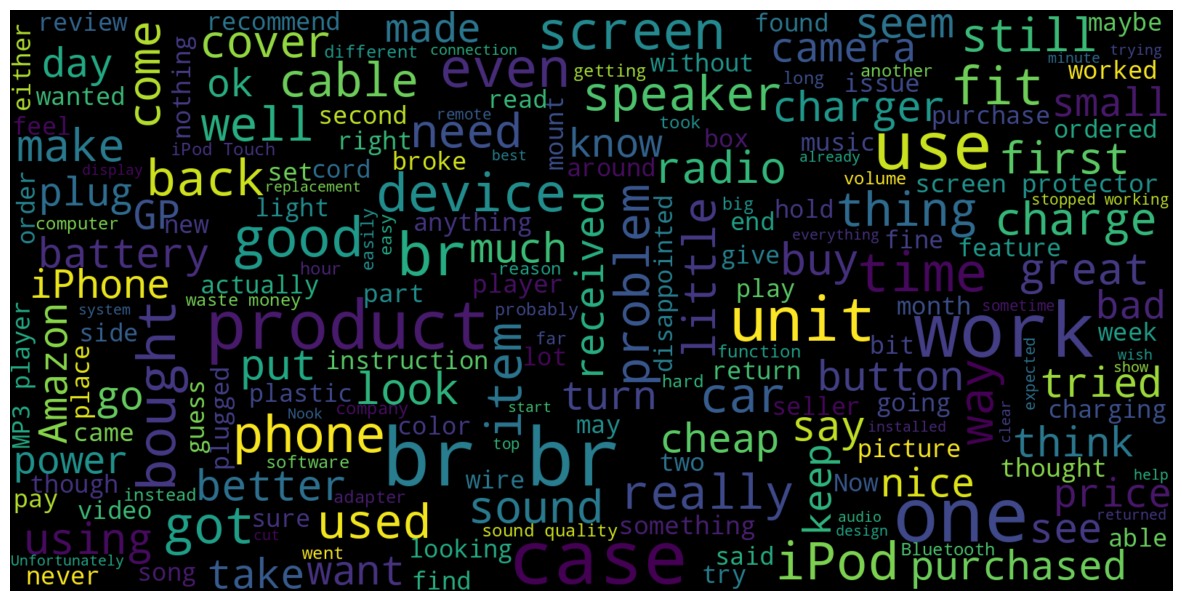

In [40]:
## create the Wordcloud of all the words with sentiment = 0 i.e. negative
## Combine All Negative Reviews into One Large Text String
consolidated=' '.join(word for word in data['Review'][data['Sentiment']==0].astype(str))
## Create WordCloud Object
wordCloud=WordCloud(width=1600,height=800,random_state=21,max_font_size=110)
##  Create a Figure for Display
plt.figure(figsize=(15,10))
## Generate and Display the WordCloud
plt.imshow(wordCloud.generate(consolidated),interpolation='bilinear')
## Remove Axes and Show the WordCloud
plt.axis('off')
plt.show()

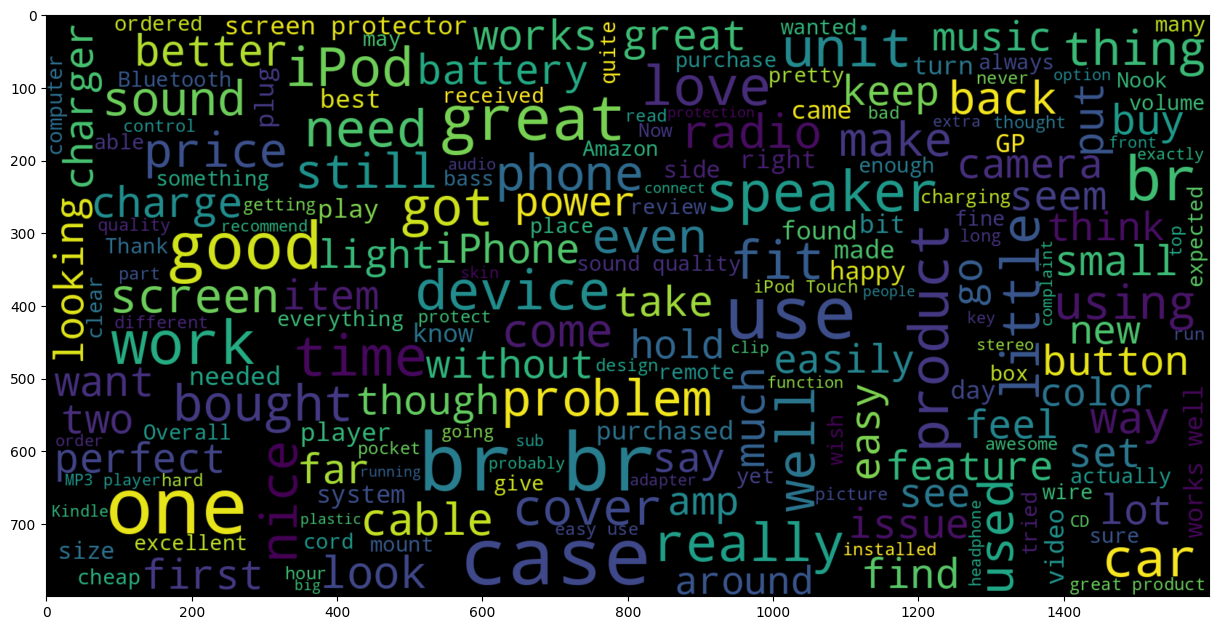

In [41]:
consolidated=' '.join(word for word in data['Review'][data['Sentiment']==1].astype(str))
wordCloud=WordCloud(width=1600,height=800,random_state=21,max_font_size=110)
plt.figure(figsize=(15,10))
plt.imshow(wordCloud.generate(consolidated),interpolation='bilinear')
plt.axis('on')
plt.show()

In [42]:
## Converting text into Vectors
cv = TfidfVectorizer(max_features=2500)
X = cv.fit_transform(data['Review'] ).toarray()

In [43]:
## Model training, Evaluation, and Prediction
from sklearn.model_selection import train_test_split
x_train ,x_test,y_train,y_test=train_test_split(X,data['Sentiment'],
                                                test_size=0.25 ,
                                                random_state=42)

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model=LogisticRegression()

#Model fitting
model.fit(x_train,y_train)

#testing the model
pred=model.predict(x_test)

#model accuracy
print(accuracy_score(y_test,pred))



0.81424


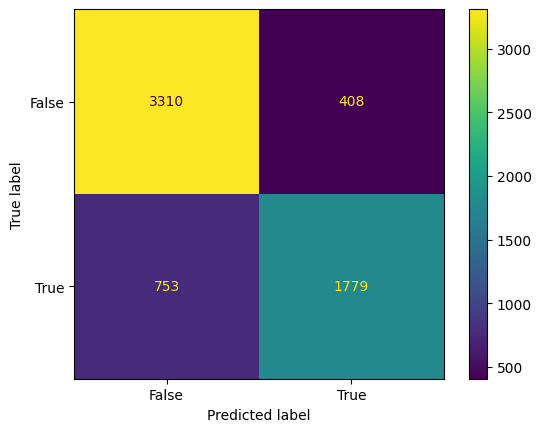

In [45]:
## confusion matrix for the result
from sklearn import metrics
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,
                                            display_labels = [False, True])

cm_display.plot()
plt.show()